In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
behav_loading = pd.read_csv('data/python_entropy_analysis/behavior_loading.csv', sep=',')
dis_loading = pd.read_csv('data/python_entropy_analysis/disease_loading.csv',sep=',')

# set thresholding percentile
thr_percentile = 75

-4.838704000000569e-05 is 36th percentile
0.0186013944 is 60th percentile
0.02213786205 is 65th percentile
0.0279034878 is 70th percentile
0.032720204 is 75th percentile


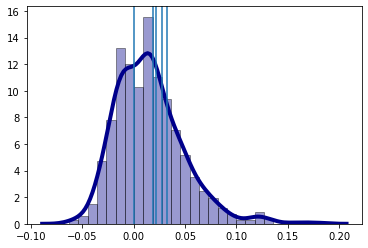

In [267]:
pos_behav_loading = np.zeros((len(behav_loading),len(behav_loading.columns)-2))
# zero negative values
column_val = 0
for j in behav_loading.columns[2:len(behav_loading.columns)]:
    for i in range(0,len(behav_loading)):
        pos_behav_loading[i,column_val] = behav_loading.iloc[i][j]
    column_val = column_val + 1
    
# percentile
print(str(np.percentile(pos_behav_loading,36)) + " is 36th percentile")
print(str(np.percentile(pos_behav_loading,60)) + " is 60th percentile")
print(str(np.percentile(pos_behav_loading,65)) + " is 65th percentile")
print(str(np.percentile(pos_behav_loading,70)) + " is 70th percentile")
print(str(np.percentile(pos_behav_loading,75)) + " is 75th percentile")

# density plot
sns.distplot(pos_behav_loading.flatten(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(0, 0, 1)
plt.axvline(0.0186,0,1)
plt.axvline(0.02213,0,1)
plt.axvline(0.02790,0,1)
plt.axvline(0.03272,0,1)

thr = np.percentile(pos_behav_loading,thr_percentile)

/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


,Comp_Behav,B.Entropy,Labels
0,IC-18,0.585818,Temporo-Limbic
1,IC-14,0.575803,Fronto-Striatal
2,IC-06,0.582568,Thal
3,IC-16,0.775560,Ventral Attention
4,IC-07,0.404897,Auditory
5,IC-20,0.269420,Medial Visual
6,IC-17,0.727944,Cognitive Control
7,IC-04,0.822831,Salience
8,IC-09,0.661351,R. Cent. Executive
9,IC-13,0.433119,DMN


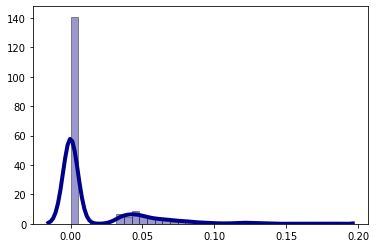

In [268]:
pos_behav_loading = np.zeros((len(behav_loading),len(behav_loading.columns)-2))

# zero negative values
column_val = 0
for j in behav_loading.columns[2:len(behav_loading.columns)]:
    for i in range(0,len(behav_loading)):
        if behav_loading.iloc[i][j] > thr:
            pos_behav_loading[i,column_val] = behav_loading.iloc[i][j]
        else: 
            pos_behav_loading[i,column_val] = 0
    column_val = column_val + 1

# density plot
sns.distplot(pos_behav_loading.flatten(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

column_sums = []
for j in range(0,pos_behav_loading.shape[1]):
        column_sums.append(np.sum(pos_behav_loading[:,j]))

# calculate probability as percentage
percentage_behav =  np.zeros((len(behav_loading),len(behav_loading.columns)-2))
for j in range(0,pos_behav_loading.shape[1]):
    for i in range(0,len(behav_loading)):
            percentage_behav[i,j] = pos_behav_loading[i][j]/column_sums[j]
    column_val = column_val + 1

# calculate entropy
p_ln_p =  -percentage_behav*np.log(percentage_behav)
behav_entropy = []
for j in range(0,pos_behav_loading.shape[1]):
        behav_entropy.append(np.nansum(p_ln_p[:,j]))
        
max_behav_entropy = behav_entropy/np.log(len(behav_loading))

d = {'Comp_Behav': behav_loading.columns[2:len(behav_loading.columns)], 
     'B.Entropy': max_behav_entropy}
df = pd.DataFrame(data=d)

# add labels
df.insert(2, "Labels", ["Temporo-Limbic",
                            "Fronto-Striatal", "Thal",
                            "Ventral Attention","Auditory",
                            "Medial Visual", "Cognitive Control",
                            "Salience","R. Cent. Executive",
                            "DMN", "L. Cent. Executive", 
                            "Hand Sensorimotor", 
                            "Mouth Sensorimotor"], True) 
  
df

0.010113463999999996 is 60th percentile
0.013858728750000007 is 65th percentile
0.017193245600000004 is 70th percentile
0.02184734025 is 75th percentile


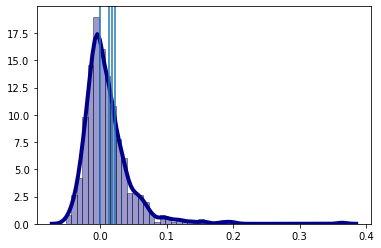

In [259]:
pos_dis_loading = np.zeros((len(dis_loading),len(dis_loading.columns)-2))

column_val = 0
for j in dis_loading.columns[2:len(dis_loading.columns)]:
    for i in range(0,len(dis_loading)):
        pos_dis_loading[i,column_val] = dis_loading.iloc[i][j]
    column_val = column_val + 1

# percentile
print(str(np.percentile(pos_dis_loading,60)) + " is 60th percentile")
print(str(np.percentile(pos_dis_loading,65)) + " is 65th percentile")
print(str(np.percentile(pos_dis_loading,70)) + " is 70th percentile")
print(str(np.percentile(pos_dis_loading,75)) + " is 75th percentile")

# density plot
sns.distplot(pos_dis_loading.flatten(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(0, 0, 1)
plt.axvline(0.01385,0,1)
plt.axvline(0.01719,0,1)
plt.axvline(0.02184,0,1)

# set density matrix threshold
thr = np.percentile(pos_dis_loading,thr_percentile)

/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in log
/Users/thomasvanasse/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in multiply


,Comp_Dis,A.Entropy,Labels
0,IC-01,0.723119,Temporo-Limbic
1,IC-02,0.566341,Fronto-Striatal
2,IC-05,0.586979,Pulvinar (Thal.)
3,IC-15,0.634280,MDN (Thal.)
4,IC-03,0.627927,Ventral Attention
5,IC-11,0.468834,Auditory
6,IC-20,0.000000,Medial Visual
7,IC-09,0.359386,Cognitive Control
8,IC-12,0.697122,Salience
9,IC-07,0.465676,R. Cent. Executive


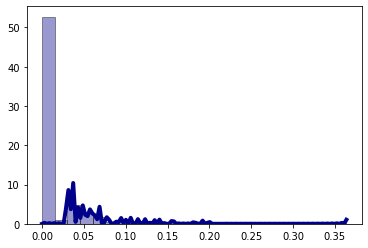

In [260]:
pos_dis_loading = np.zeros((len(dis_loading),len(dis_loading.columns)-2))

# zero negative values
column_val = 0
for j in dis_loading.columns[2:len(dis_loading.columns)]:
    for i in range(0,len(dis_loading)):
        if dis_loading.iloc[i][j] > thr:
            pos_dis_loading[i,column_val] = dis_loading.iloc[i][j]
        else: 
            pos_dis_loading[i,column_val] = 0
    column_val = column_val + 1
    
# density plot
sns.distplot(pos_dis_loading.flatten(), hist=True, kde=True, 
             color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

column_sums = []
for j in range(0,pos_dis_loading.shape[1]):
        column_sums.append(np.sum(pos_dis_loading[:,j]))
    
# calculate probability as percentage
percentage_dis =  np.zeros((len(dis_loading),len(dis_loading.columns)-2))
for j in range(0,pos_dis_loading.shape[1]):
    for i in range(0,len(dis_loading)):
            percentage_dis[i,j] = pos_dis_loading[i][j]/column_sums[j]
    column_val = column_val + 1

# calculate entropy
p_ln_p =  -percentage_dis*np.log(percentage_dis)
dis_entropy = []
for j in range(0,pos_dis_loading.shape[1]):
        dis_entropy.append(np.nansum(p_ln_p[:,j]))
        
max_dis_entropy = dis_entropy/np.log(len(dis_loading))

d = {'Comp_Dis': dis_loading.columns[2:len(dis_loading.columns)], 
     'A.Entropy': max_dis_entropy}
df_dis = pd.DataFrame(data=d)

# add labels
df_dis.insert(2, "Labels", ["Temporo-Limbic",
                           "Fronto-Striatal",
                           "Pulvinar (Thal.)",
                           "MDN (Thal.)",
                           "Ventral Attention",
                           "Auditory",
                           "Medial Visual",
                           "Cognitive Control",
                           "Salience",
                           "R. Cent. Executive", 
                           "Anterior DMN", 
                           "Posterior DMN",
                           "L. Cent. Executive", 
                           "Sensorimotor"])

df_dis

In [261]:
#df_dis.join(df, on="Labels")
result = pd.merge(df_dis, df, on='Labels')
result

,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy
0,IC-01,0.723119,Temporo-Limbic,IC-18,0.567957
1,IC-02,0.566341,Fronto-Striatal,IC-14,0.502196
2,IC-03,0.627927,Ventral Attention,IC-16,0.755412
3,IC-11,0.468834,Auditory,IC-07,0.404897
4,IC-20,0.000000,Medial Visual,IC-20,0.170689
5,IC-09,0.359386,Cognitive Control,IC-17,0.644141
6,IC-12,0.697122,Salience,IC-04,0.771731
7,IC-07,0.465676,R. Cent. Executive,IC-09,0.607606
8,IC-16,0.640560,L. Cent. Executive,IC-03,0.664307


In [262]:
# add other matched networks (that were split) manually
result = result.append({'Labels' : "Pulvinar (Thal.)",
                       'Comp_Dis': df_dis["Comp_Dis"][2],
                       'A.Entropy': df_dis["A.Entropy"][2],
                       'Comp_Behav': df["Comp_Behav"][2],
                       'B.Entropy': df["B.Entropy"][2]}, ignore_index=True)

result = result.append({'Labels' : "MDN (Thal.)",
                       'Comp_Dis': df_dis["Comp_Dis"][3],
                       'A.Entropy': df_dis["A.Entropy"][3],
                       'Comp_Behav': df["Comp_Behav"][2],
                       'B.Entropy': df["B.Entropy"][2]}, ignore_index=True)

result = result.append({'Labels' : "Anterior DMN",
                       'Comp_Dis': df_dis["Comp_Dis"][10],
                       'A.Entropy': df_dis["A.Entropy"][10],
                       'Comp_Behav': df["Comp_Behav"][9],
                       'B.Entropy': df["B.Entropy"][9]}, ignore_index=True)

result = result.append({'Labels' : "Posterior DMN",
                       'Comp_Dis': df_dis["Comp_Dis"][11],
                       'A.Entropy': df_dis["A.Entropy"][11],
                       'Comp_Behav': df["Comp_Behav"][9],
                       'B.Entropy': df["B.Entropy"][9]}, ignore_index=True)

result = result.append({'Labels' : "Hand Sensorimotor",
                       'Comp_Dis': df_dis["Comp_Dis"][13],
                       'A.Entropy': df_dis["A.Entropy"][13],
                       'Comp_Behav': df["Comp_Behav"][11],
                       'B.Entropy': df["B.Entropy"][11]}, ignore_index=True)

result = result.append({'Labels' : "Mouth Sensorimotor",
                       'Comp_Dis': df_dis["Comp_Dis"][13],
                       'A.Entropy': df_dis["A.Entropy"][13],
                       'Comp_Behav': df["Comp_Behav"][12],
                       'B.Entropy': df["B.Entropy"][12]}, ignore_index=True)

In [263]:
result

,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy
0,IC-01,0.723119,Temporo-Limbic,IC-18,0.567957
1,IC-02,0.566341,Fronto-Striatal,IC-14,0.502196
2,IC-03,0.627927,Ventral Attention,IC-16,0.755412
3,IC-11,0.468834,Auditory,IC-07,0.404897
4,IC-20,0.000000,Medial Visual,IC-20,0.170689
5,IC-09,0.359386,Cognitive Control,IC-17,0.644141
6,IC-12,0.697122,Salience,IC-04,0.771731
7,IC-07,0.465676,R. Cent. Executive,IC-09,0.607606
8,IC-16,0.640560,L. Cent. Executive,IC-03,0.664307
9,IC-05,0.586979,Pulvinar (Thal.),IC-06,0.507668


In [264]:
import pickle
cor_mat = pd.read_pickle("data/cor_mat.pkl")
cor_mat['VBM-01']['FUNC-18']
result["r"] = np.nan

for iter_match in range(0,len(result)):
    result.loc[iter_match,"r"] = cor_mat[('VBM-' + result.loc[iter_match]["Comp_Dis"][3:5])][('FUNC-' + result.loc[iter_match]["Comp_Behav"][3:5])]
result

,Comp_Dis,A.Entropy,Labels,Comp_Behav,B.Entropy,r
0,IC-01,0.723119,Temporo-Limbic,IC-18,0.567957,0.615340
1,IC-02,0.566341,Fronto-Striatal,IC-14,0.502196,0.615189
2,IC-03,0.627927,Ventral Attention,IC-16,0.755412,0.523496
3,IC-11,0.468834,Auditory,IC-07,0.404897,0.515131
4,IC-20,0.000000,Medial Visual,IC-20,0.170689,0.481923
5,IC-09,0.359386,Cognitive Control,IC-17,0.644141,0.416162
6,IC-12,0.697122,Salience,IC-04,0.771731,0.431350
7,IC-07,0.465676,R. Cent. Executive,IC-09,0.607606,0.388593
8,IC-16,0.640560,L. Cent. Executive,IC-03,0.664307,0.335983
9,IC-05,0.586979,Pulvinar (Thal.),IC-06,0.507668,0.544776


In [265]:
result.to_csv("data/python_entropy_analysis/entropy_correlation_data_" + str(thr_percentile) + "perc.csv")